# Basic read and write operations

In this example we will explore how to create and read a simple Lightning Memory-Mapped Database (LMDB).

## Writing data

In [1]:
import time

import numpy as np

import pyxis

Let's start by creating some data that we can store. `10000` images with shape `(254, 254, 3)` along with `10000` targets are generated.

In [2]:
nb_samples = 10000

X = np.zeros((nb_samples, 254, 254, 3), dtype=np.uint8)
y = np.arange(nb_samples, dtype=np.uint8)

The tenth image image is set to be a completely red image.

In [3]:
X[10, :, :, 0] = 255

In the next step we instantiate a LMDB writer to write the data we created above to a directory called `data`.

In [4]:
db = pyxis.Writer(dirpath='data',
                  input_shape=(254,254,3), target_shape=(),
                  input_dtype=np.uint8, target_dtype=np.uint8,
                  map_size_limit=4000, ram_gb_limit=2)

Both the inputs and targets are values from `0` to `255`. `map_size_limit` is the size of the LMDB in MB. For file systems running *ext4*, there is no big cost associated with making this big. `ram_size_limit` is the limit on how many GB of data we can push per write operation.

When the LMDB writer is set up, we can run the `pyxis.put_samples` function to write data. Ideally you should send large data blobs at once. Here we will write all the `10000` samples generated above at once. If the size of the data you have is larger than the size of your RAM, then you can perform multiple calls to `pyxis.put_samples`.

In [5]:
start = time.time()

db.put_samples(X, y)

print('Average time per image = {:.4f}s'.format((time.time() - start)/nb_samples))

Average time per image = 0.0013s


Make sure to close the LMDB environment after writing. The close operaton makes sure to store the number of samples that has been written.

In [6]:
db.close()

## Reading data

In [7]:
try:
    %matplotlib inline
    import matplotlib.pyplot as plt
except ImportError:
    raise ImportError('Could not import the matplotlib library required to '
                      'plot images. Please refer to http://matplotlib.org/ '
                      'for installation instructions.')

To read data from a LMDB we instantiate a LMDB reader using the directory of the database.

In [8]:
db = pyxis.Reader('data')

The `pyxis.get_sample` function can be used to retrieve any input and target pair from the LMDB. `pyxis.get_input` and `pyxis.get_target` can be used to only get inputs and targets, respectively.

In [9]:
X, y = db.get_sample(10)
print('X: ', X.shape, X.dtype)
print('y: ', y.shape, y.dtype)

X:  (254, 254, 3) uint8
y:  () uint8


The code snippet above retrives the tenth sample, i.e. the one with the red image.

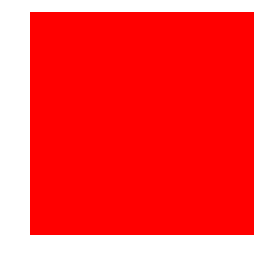

In [10]:
plt.figure()
plt.imshow(X)
plt.axis('off')
plt.show()

Just like when writing, we should make sure to close the LMDB environment after we are done reading.

In [11]:
db.close()